In [17]:
from hack_itau_quant import Denoising, HRP
from hack_itau_quant.markowitz_monte_carlo import MarkowitzMonteCarlo

import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
returns = pd.read_csv('returns_for_gan.csv', index_col='Date')

In [3]:
returns.head()

,BetaShares Gold Bullion Currency Hedged,Vanguard Australian Shares,iShares S&P/ASX Dividend Opportunities,Ishares Core S&P/Asx 200,Vanguard Australian Property Securities,Vanguard Australian Shares High Yield,ETFS Physical Gold,BetaShares US Dollar,Vanguard All World Ex US Shares,iSharesGlobal 100,...,Ennakl Automobiles SA,Poulina Group Holding,Societe Frigorifique Et Brasserie,Societe Moderne De Ceramique,Société Tunisienne d'Entreprises de Télécommunication,Societe Tunisienne De L'Air,Telnet Holding,Societe Tunisie Profiles Aluminium,Union Internationale De Banques,Societe Tunisienne De Verreries
Date,,,,,,,,,,,,,,,,,,,,,
2011-12-02,-0.001142,0.011482,0.000000,0.013609,0.002134,0.009771,-0.001932,0.003093,-0.002933,0.006329,...,0.008772,0.007143,-0.001692,-0.041436,0.014516,0.000000,0.007865,0.008264,-0.003214,0.026940
2011-12-05,0.001144,0.011712,0.000000,0.009667,0.014696,0.018118,0.002480,0.002055,0.011275,0.005241,...,-0.010870,-0.009456,0.001695,0.020173,-0.006359,-0.005917,-0.006689,-0.004918,0.000000,-0.014690
2011-12-06,-0.018846,-0.012823,-0.014085,-0.014894,-0.000840,-0.006269,-0.013820,0.004103,-0.003878,-0.008690,...,-0.005495,-0.021480,-0.018613,0.002825,0.006400,-0.005952,-0.012346,-0.011532,-0.000537,-0.001065
2011-12-07,0.011059,0.003608,0.005714,0.009719,-0.005882,0.000407,-0.000857,-0.010215,0.000000,0.012973,...,0.019890,0.000000,0.017241,0.000000,-0.014308,0.005988,0.018182,0.000000,0.000000,0.002132
2011-12-08,0.004606,0.000539,-0.005682,-0.002139,-0.000845,0.000000,0.005022,0.001032,0.006083,-0.000346,...,-0.002167,-0.006098,0.002542,0.000000,-0.009677,0.011905,-0.017857,0.008333,-0.001613,-0.001064


In [4]:
returns_sample = returns.iloc[:, :1500]
returns_sample.shape

(2500, 1500)

In [5]:
n_facts = 100
alpha = .995

denoising = Denoising(returns = returns_sample, n_facts = n_facts, alpha = alpha)

<AxesSubplot:>

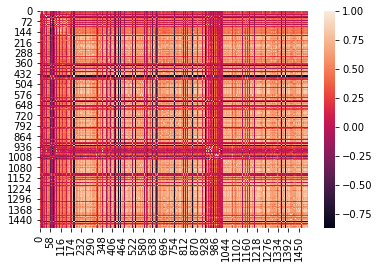

In [6]:
sns.heatmap(denoising.remove_noise_with_mean())

<AxesSubplot:>

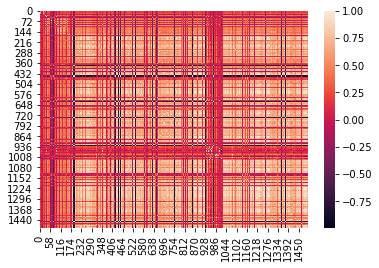

In [7]:
sns.heatmap(denoising.remove_noise_with_shrinkage())

In [8]:
denosing_mean = denoising.remove_noise_with_mean()
denosing_mean_df = pd.DataFrame(denosing_mean, columns=returns_sample.columns, index=returns_sample.columns)

/home/leme/miniconda3/envs/general/lib/python3.9/site-packages/seaborn/matrix.py:649: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



array([0.00092407, 0.00069944, 0.00067721, ..., 0.00024112, 0.00026784,
       0.00033219])

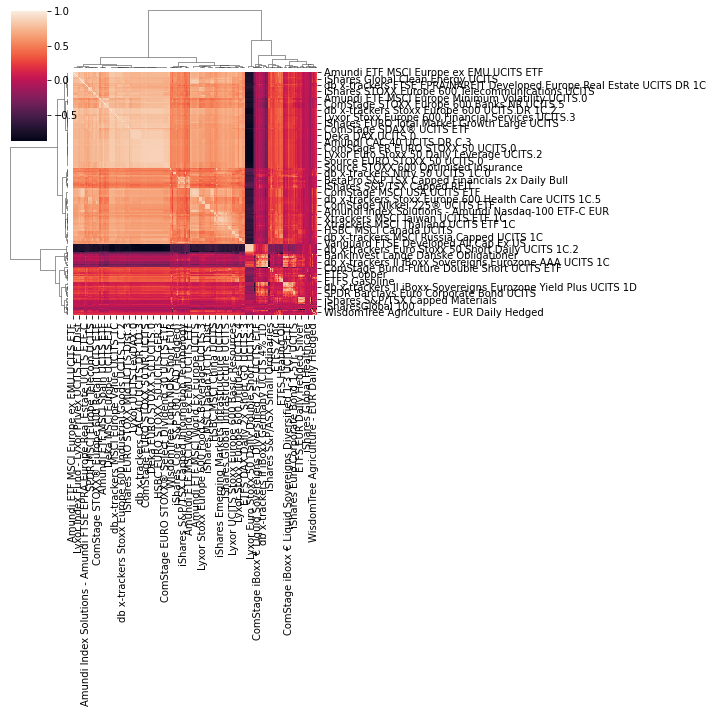

In [9]:
HRP(denosing_mean_df).optimize()

In [10]:
denosing_shrinkage = denoising.remove_noise_with_shrinkage()
denosing_shrinkage_df = pd.DataFrame(denosing_shrinkage, columns=returns_sample.columns, index=returns_sample.columns)

/home/leme/miniconda3/envs/general/lib/python3.9/site-packages/seaborn/matrix.py:649: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



array([0.00145309, 0.00125422, 0.00071385, ..., 0.00017607, 0.0002648 ,
       0.00214544])

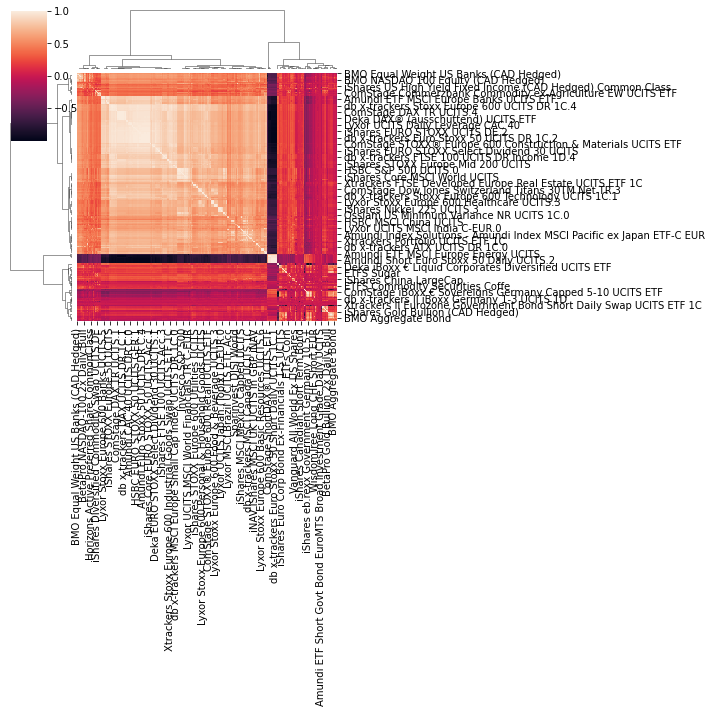

In [11]:
HRP(denosing_shrinkage_df).optimize()

In [12]:
returns_mini_sample = returns.iloc[:, :6]

expected_returns = returns_mini_sample.mean().to_numpy().reshape(-1)
original_cov_matrix = returns_mini_sample.cov()

mean_cov_matrix = denosing_mean[:6, :6]
shrinkage_cov_matrix = denosing_shrinkage[:6, :6]

3.093741247442451

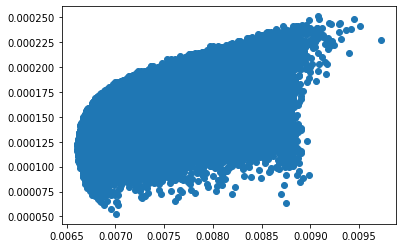

In [24]:
mmc_original = MarkowitzMonteCarlo(expected_returns, original_cov_matrix, 100000)
mmc_original.plot_efficient_frontier()
w = mmc_original.get_min_vol()

np.dot(expected_returns, w) * 252 * 100

2.7448053212182426

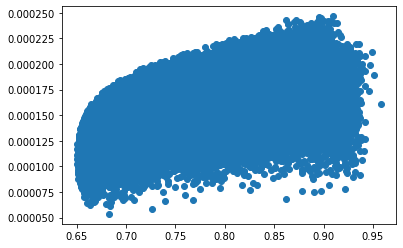

In [26]:
mmc_mean = MarkowitzMonteCarlo(expected_returns, mean_cov_matrix, 100000)
mmc_mean.plot_efficient_frontier()
w = mmc_mean.get_min_vol()

np.dot(expected_returns, w) * 252 * 100

3.2433114647165273

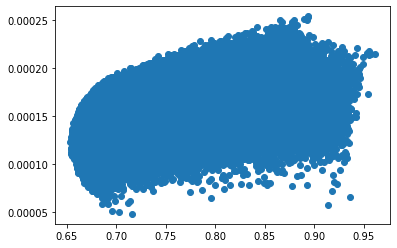

In [25]:
mmc_shrinkage = MarkowitzMonteCarlo(expected_returns, shrinkage_cov_matrix, 100000)
mmc_shrinkage.plot_efficient_frontier()
w = mmc_shrinkage.get_min_vol()

np.dot(expected_returns, w) * 252 * 100